In [1]:
#Artificial Neural Network

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:, 13]

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [7]:
# our dataset without the unnecessary columns
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [6]:
#Create dummy  variables
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
#concatinate the new dummy variables to the data along the column axis
X = pd.concat([X,geography,gender],axis=1)

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [9]:
# drop the original gender column
X = X.drop(['Geography','Gender'],axis=1)

In [10]:
X.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# we split the features and labels into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [14]:
# we need the scale the data because our NN works better with small number 
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from keras.wrappers.scikit_learn import KerasClassifier
# from keras.wrappers.scikit_learn import 

In [17]:
from sklearn.model_selection import GridSearchCV

In [30]:
import tensorflow
from tensorflow.keras.models import Sequential

In [31]:
# 
def create_model(layers,activation):
    model = Sequential()
    for i , nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
    model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [29]:
# from scikeras.wrappers import KerasClassifier, KerasRegressor

In [32]:
model= KerasClassifier(build_fn=create_model, verbose=0)

C:\Users\User\AppData\Local\Temp/ipykernel_17120/1510184339.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model= KerasClassifier(build_fn=create_model, verbose=0)


In [33]:
layers = [[20],[40,20],[45,30,15]]
activations = ['sigmoid','relu']
param_grid = dict(layers=layers,activation=activations,batch_size=[128,256],epochs=[30])


In [34]:
grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=5)

In [35]:
grid_result = grid.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\User\AppData\Local\Temp/ipykernel_17120/2170773724.py", line 6, in create_model
    model.add(Dense(nodes,input_dim=X_train.shape[1]))
NameError: name 'Dense' is not defined

  warnings.warn("Estimator fit failed. The score on this 

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\User\AppData\Local\Temp/ipykernel_17120/2170773724.py", line 6, in create_model
    model.add(Dense(nodes,input_dim=X_train.shape[1]))
NameError: name 'Dense' is not defined

  warnings.warn("Estimator fit failed. The score on this 

NameError: name 'Dense' is not defined

In [36]:
# importing the keras libraries and packages
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [37]:
# Initializing the ANN
classifier = Sequential()

In [38]:
classifier.add(Dense(units=10,kernel_initializer='he_normal',
                     activation='relu',input_dim=11))
classifier.add(Dropout(0.3))

In [39]:
classifier.add(Dense(units=20,kernel_initializer='he_normal',
                     activation='relu'))
classifier.add(Dropout(0.4))

In [40]:
classifier.add(Dense(units=15,kernel_initializer='he_normal',
                     activation='relu'))
classifier.add(Dropout(0.2))

In [41]:
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',
                     activation='sigmoid'))

In [42]:
#compilling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',
                   metrics=['accuracy'])

In [43]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,
                               batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 3s 3ms/step - loss: 0.6461 - accuracy: 0.7199 - val_loss: 0.5157 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5431 - accuracy: 0.7845 - val_loss: 0.4975 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5031 - accuracy: 0.7970 - val_loss: 0.4784 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4970 - accuracy: 0.7951 - val_loss: 0.4696 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4743 - accuracy: 0.7977 - val_loss: 0.4574 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4658 - accuracy: 0.7983 - val_loss: 0.4470 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4632 - accuracy: 0.7975 - val_loss: 0.4417 - val_accuracy: 0.7978

Epoch 58/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3679 - accuracy: 0.8425 - val_loss: 0.3617 - val_accuracy: 0.8501
Epoch 59/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3631 - accuracy: 0.8505 - val_loss: 0.3604 - val_accuracy: 0.8493
Epoch 60/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3590 - accuracy: 0.8500 - val_loss: 0.3613 - val_accuracy: 0.8523
Epoch 61/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3634 - accuracy: 0.8502 - val_loss: 0.3628 - val_accuracy: 0.8474
Epoch 62/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3705 - accuracy: 0.8429 - val_loss: 0.3609 - val_accuracy: 0.8538
Epoch 63/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3613 - accuracy: 0.8496 - val_loss: 0.3599 - val_accuracy: 0.8508
Epoch 64/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3638 - accuracy: 0.8485 - val_loss: 0.3645 - val_accuracy:

In [35]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [39]:
y_pred = classifier.predict(X_test)

In [45]:
y_pred = (y_pred > 0.5)

In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [47]:
cm = confusion_matrix(y_pred,y_test)

In [48]:
cr = classification_report(y_pred,y_test)

In [52]:
print(cm)

[[1505  194]
 [  90  211]]


In [51]:
print(cr)

              precision    recall  f1-score   support

       False       0.94      0.89      0.91      1699
        True       0.52      0.70      0.60       301

    accuracy                           0.86      2000
   macro avg       0.73      0.79      0.76      2000
weighted avg       0.88      0.86      0.87      2000



In [59]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [48]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epoch = range(0,len(loss))

Text(0.5, 0, 'epoch')

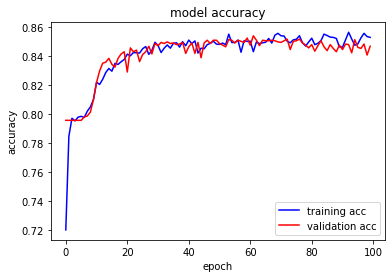

In [53]:
plt.plot(epoch, acc, 'b-', label='training acc')
plt.plot(epoch, val_acc, 'r-', label='validation acc')
plt.title('model accuracy')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

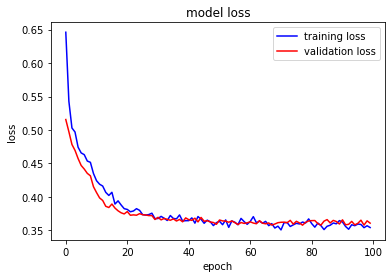

In [54]:
plt.plot(epoch, loss, 'b-', label='training loss')
plt.plot(epoch, val_loss, 'r-', label='validation loss')
plt.title('model loss')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epoch')